In [103]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100,n_classes=2,n_clusters_per_class=1,n_informative=1,n_redundant=0,n_features=2,hypercube=False,random_state=41,class_sep=10)

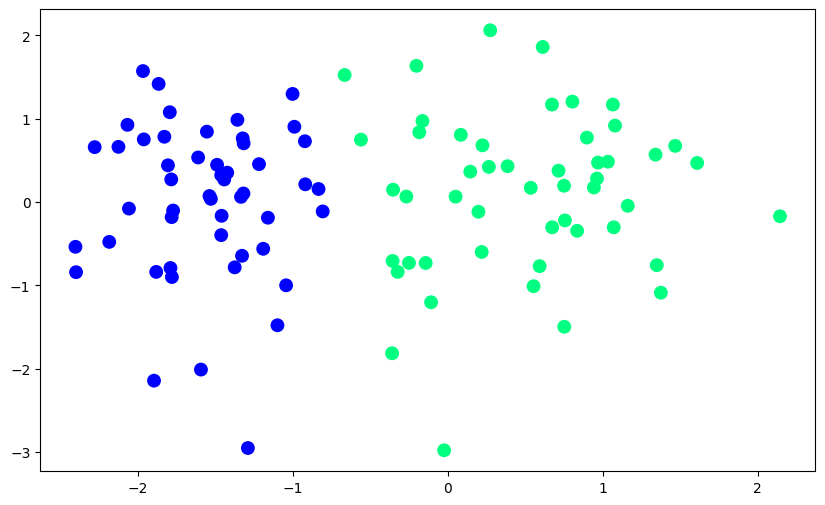

In [104]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap ="winter",s=80)

In [105]:
##imports
import numpy as np
import random

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [107]:
import math

In [108]:
class Perceptron:
    def __init__(self):
        self._intercept=None
        self._coef = None

    def sigmoid(self,z):
        y = (1/(1+(math.e)**(-z)))
        #  print(y)
        return y
    def improve(self,w,X,y,j,z):
        lr=0.1
        for i in range(len(w)):
            w[i] = w[i] + lr*((y[j]-self.sigmoid(z))*X[j][i])
        return w
  
    def fit(self,X,y):
        weights = np.ones(X.shape[1]+1)
        X= np.insert(X,0,1,axis=1)
        for i in range(100):
            for j in range(X.shape[0]):
                z = np.dot(weights,X[j])
                weights = self.improve(weights,X,y,j,z)
        self._intercept = weights[0]
        self._coef = weights[1:]
        
            
        
p =Perceptron()
p.fit(X,y)

In [109]:
p._coef

array([9.03515893, 0.47226802])

In [110]:

y_test

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [111]:
weights = p._coef
weights=np.insert(weights,0,p._intercept)
weights


array([5.97712206, 9.03515893, 0.47226802])

In [112]:
def step(z):
    return (1/(1+(math.e)**(-z)))

In [113]:
def get_predictions(X):
    predictions = []
    X=np.insert(X,0,1,axis=1)
    for i in range(len(X)):
        
        prediction = step(np.dot(weights,X[i]))
        predictions.append(prediction)
    return predictions
preds = get_predictions(X)

In [114]:
for index,pred in enumerate(preds):
    if pred>0.5:
        preds[index] = 1
    else:
        preds[index] = 0
preds


[1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1]

In [115]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,preds))

1.0


In [116]:
m = -p._coef[0]/p._coef[1]
b = -p._intercept/p._coef[1]
x_input = np.linspace(-3,3,100)
y_input = m*x_input +b

(-3.0, 2.0)

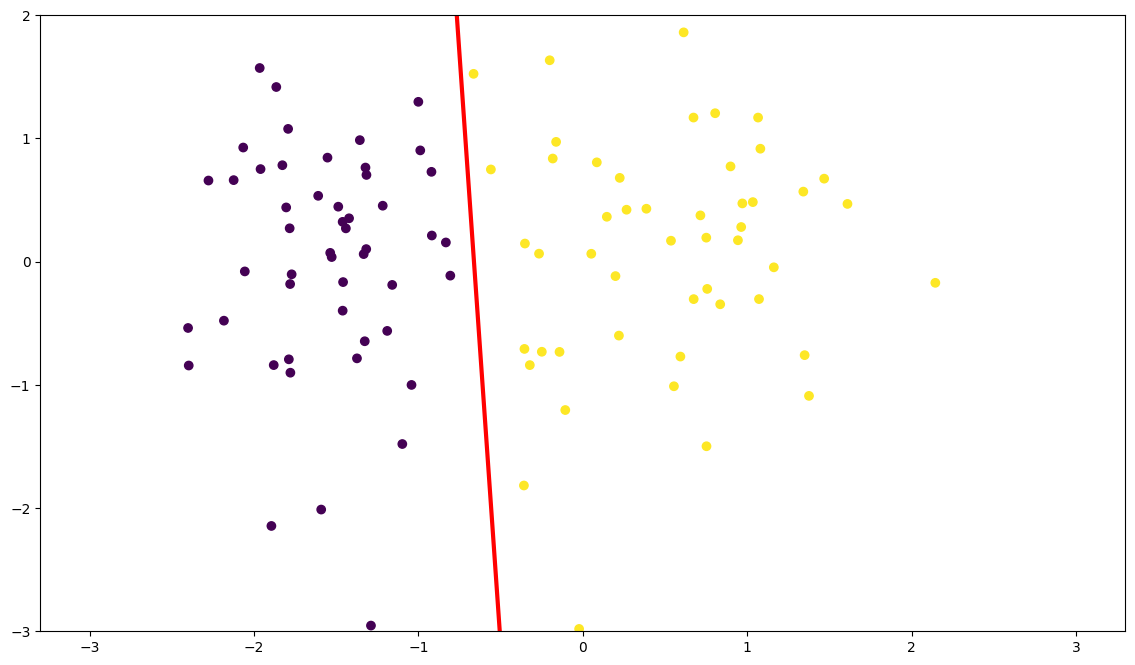

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_input,y_input,color="red",linewidth =3)
plt.ylim(-3,2)